<a href="https://colab.research.google.com/github/Tower5954/TensorFlow/blob/main/03_Introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow.

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognising the car in-front 

## Get the data.

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-11-17 06:15:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.125.128, 142.250.157.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  29.1MB/s    in 3.6s    

2021-11-17 06:15:06 (29.1 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



🔑**Note:**🔑 We start with smaller datasets so we can experiment quickly and figure what works (or better yet, what does not work) before scaling up. 

## Inspect the data (become one with it).

A very crucial step at the beginning of any machine learning project is becoming one with the data.

For a computer vision project...this usually involves visualising many samples of the data. 

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [6]:
# The extra file in the pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Nov 17 06:15 .
drwxr-xr-x 1 root root 4096 Nov 17 06:15 ..
-rw-r--r-- 1 root root 6148 Nov 17 06:15 .DS_Store
drwxr-xr-x 4 root root 4096 Nov 17 06:15 test
drwxr-xr-x 4 root root 4096 Nov 17 06:15 train


In [7]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualise the images, first let us get the class names programmatically.

In [9]:
# Get the classnames programmatically

import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")

class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Craeted a list of classnames from the subdirectories

print(class_names)

['.DS_Store' 'pizza' 'steak']


In [10]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")

class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Craeted a list of classnames from the subdirectories
class_names = class_names[1:]
print(class_names)

['pizza' 'steak']




Visualise our images.

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mping
import random


def view_random_image(target_dir, target_class):
  # Set up the target directory (we will view the images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1) 
  print(random_image)

  # Read in the image using matplotlib
  img = mping.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");


  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img

View a random image from the training set

['3364420.jpg']
Image shape: (512, 512, 3)


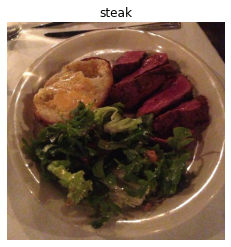

In [ ]:
img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

['1033251.jpg']
Image shape: (512, 512, 3)


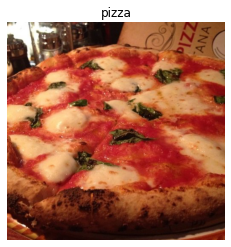

In [13]:
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

In [14]:
img.dtype

dtype('uint8')

In [15]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[102, 100,  88],
        [102, 100,  87],
        [105, 102,  85],
        ...,
        [120,  68,  21],
        [119,  67,  20],
        [120,  68,  21]],

       [[ 99,  95,  83],
        [104,  98,  84],
        [110, 103,  85],
        ...,
        [121,  69,  22],
        [120,  68,  21],
        [124,  72,  25]],

       [[ 97,  88,  71],
        [105,  97,  78],
        [114, 103,  83],
        ...,
        [120,  68,  21],
        [119,  67,  20],
        [126,  74,  27]],

       ...,

       [[131,  49,  28],
        [124,  42,  21],
        [119,  37,  16],
        ...,
        [152,  67,  38],
        [150,  65,  34],
        [139,  54,  23]],

       [[132,  49,  31],
        [126,  43,  25],
        [124,  41,  23],
        ...,
        [152,  69,  39],
        [144,  61,  29],
        [127,  44,  12]],

       [[121,  38,  22],
        [120,  37,  21],
        [122,  39,  23],
        ...,
        [150,  67,  3

In [ ]:
# View the image shape

img.shape # returns width, height, colour channels

(512, 512, 3)

🔑 **Note:** 🔑 Many machine learning models, including neural networks prefer the values they work with to be 0 & 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalisation**) the pixel values by dividing the image arrays by 255 (since 255 is the maximum pixel value).

In [ ]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.5254902 , 0.25882353, 0.20784314],
        [0.5254902 , 0.25882353, 0.20784314],
        [0.52941176, 0.25490196, 0.21568627],
        ...,
        [0.22352941, 0.08235294, 0.03529412],
        [0.25098039, 0.10980392, 0.05490196],
        [0.26666667, 0.1254902 , 0.07058824]],

       [[0.46666667, 0.20784314, 0.16078431],
        [0.5254902 , 0.25882353, 0.21568627],
        [0.54117647, 0.2745098 , 0.23921569],
        ...,
        [0.23921569, 0.09019608, 0.04705882],
        [0.25882353, 0.10980392, 0.05882353],
        [0.25098039, 0.10588235, 0.04313725]],

       [[0.4627451 , 0.21176471, 0.17254902],
        [0.5254902 , 0.2627451 , 0.22745098],
        [0.50588235, 0.23529412, 0.20784314],
        ...,
        [0.28627451, 0.12941176, 0.08235294],
        [0.29411765, 0.14117647, 0.08235294],
        [0.25882353, 0.10588235, 0.04705882]],

       ...,

       [[0.23529412, 0.09019608, 0.        ],
        [0.25882353, 0.10196078, 0.00392157],
        [0.27058824, 0

## An end-to-end example.


We will build a convolutional neural network to find patterns in our images, more specifically we need a way to: 
* Load the images
* Preprocess the images 
* Build a CNN to find patterns in our images
* Compile the CNN 
* Fit the CNN to the training data 

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
# Set the seed 
tf.random.set_seed(42)

# Preprocess data (get all the pixel values between 0 and 1, also called scaling/normalisation)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set up paths to the directories 
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(244, 244),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(244, 244),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (This is the same model as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(244, 244, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the CNN 
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model 
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 43s 261ms/step - loss: 0.5636 - accuracy: 0.7047 - val_loss: 0.4267 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 11s 242ms/step - loss: 0.4263 - accuracy: 0.8080 - val_loss: 0.3477 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 11s 244ms/step - loss: 0.3742 - accuracy: 0.8400 - val_loss: 0.3028 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 12s 246ms/step - loss: 0.3184 - accuracy: 0.8707 - val_loss: 0.3152 - val_accuracy: 0.8780
Epoch 5/5
47/47 [==============================] - 11s 243ms/step - loss: 0.2637 - accuracy: 0.8940 - val_loss: 0.2836 - val_accuracy: 0.8720


🔑 **Note:** 🔑 If the above cell is taking longer than ~1 minute per epoch, make sure that you are using a GPU by going to Runtime -> Change Runtime type -> Hardware Accelarator -> GPU.
(You may have to rerun the cells above). 

In [ ]:
# Without a GPU
# 47/47 [==============================] - 126s 3s/step - loss: 0.5639 - accuracy: 0.7193 - val_loss: 0.4292 - val_accuracy: 0.8400

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 242, 242, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 240, 240, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 120, 120, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 118, 118, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 116, 116, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 58, 58, 10)       0         
 2D)                                                    

## Using the same model as before

---

Replicate the model built in a previous section, to see if it will work with image data.

The model we will build is from the [TensorFlow playground]('https://playground.tensorflow.org/#activation=relu&batchSize=30&dataset=gauss&regDataset=reg-plane&learningRate=0.0001&regularizationRate=0&noise=0&networkShape=5,6,6,2&seed=0.34082&showTestData=true&discretize=false&percTrainData=80&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false').

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 219ms/step - loss: 0.7105 - accuracy: 0.4973 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 209ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 210ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 209ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 209ms/step - loss: 0.6932 - accuracy: 0.4853 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, None)              0         
                                                                 
 dense_1 (Dense)             (None, 4)                 714436    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 714,461
Trainable params: 714,461
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_data

Despite having more than 20x more parameters than our CNN (model_1), model_2 performs terribly

**model_3**

In [ ]:
# set random seed 
tf.random.set_seed(42)

# Create a model (same as the previous model but tweeked)
model_3 = tf.keras.Sequential([
                  tf.keras.layers.Flatten(),
                  tf.keras.layers.Dense(100, activation='relu'),
                  tf.keras.layers.Dense(100, activation='relu'),
                  tf.keras.layers.Dense(100, activation='relu'),
                  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model 
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, 
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 217ms/step - loss: 2.7543 - accuracy: 0.6140 - val_loss: 0.8464 - val_accuracy: 0.6540
Epoch 2/5
47/47 [==============================] - 10s 210ms/step - loss: 0.7619 - accuracy: 0.7067 - val_loss: 0.4970 - val_accuracy: 0.7440
Epoch 3/5
47/47 [==============================] - 10s 210ms/step - loss: 0.5630 - accuracy: 0.7527 - val_loss: 0.6267 - val_accuracy: 0.6980
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.6169 - accuracy: 0.7460 - val_loss: 0.6138 - val_accuracy: 0.6800
Epoch 5/5
47/47 [==============================] - 10s 208ms/step - loss: 0.5830 - accuracy: 0.7353 - val_loss: 0.6285 - val_accuracy: 0.7180


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, None)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               17860900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 17,881,201
Trainable params: 17,881,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
17881201/36651

487.8775749638482

`model_3` has nearly 500 times more parameters than `model_1`. However, `model_1` still performs better.

🔑 **Note:** 🔑 You may think of a trainable parameter as **patterns a model can learn from data.** Intuitevely, you may think more are better. In a lot of cases, it is. However, in this case, the difference is the two different styles of models that we are using. Where a series of dense layers has a number of different learnable parameters connected to one another and hence a number of possible learning patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image.** So even though, there are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between different **features** in an image. 

## Binary classification: Breaking it down.



---

1. Become one with the data (visualise, visualise, visualise).
2. Preprocess the data (prepare it for the model, the main step is to scale/normalise and turning the data into batches).
3. Create a model (start with a baseline).
4. Fit the model.
5. Evaluate the model.
6. Adjust different parameters and improve the model (try to better the baseline).
7. Repeat until satisfied (Experiment, experiment, experiment).



---








### 1.Become one with the data.



['3280453.jpg']
Image shape: (512, 512, 3)
['1403878.jpg']
Image shape: (512, 512, 3)


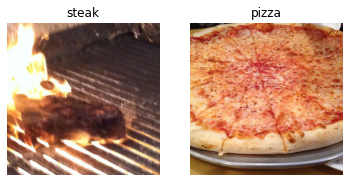

In [18]:
# Visualise the data

plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')

plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')



### 2.Preprocess the data (prepare it for a model)

In [19]:
# Define the directory dataset paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

The next step is to turn the data into **batches**.

A batch is a small subset of data. Rather than look at the full dataset's images all at one time, a model may only look at 32 at one time. 

It does this for a few reasons:    
1. 10,000 images (or more) may not fit in the memory of the processor (GPU)


```
!nvidia-smi
```
2. Trying to learn the pattern in 10,000 images in one go, could result in the model not performing/learning very well.

**Why 32?**

Because 32 is good for your health...
[Yann Lecun](https://twitter.com/ylecun/status/989610208497360896?s=20)





In [20]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

[ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)





In [21]:
# Load in the image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(244,244),   # Target size of images(height, width)
                                               class_mode='binary',     # Type of data you are working with
                                               batch_size=32)           # Size of minibatches to load data into.

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(244,244),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Get a sample of train data batch.

In [22]:
images, labels = train_data.next() # get the 'next' batch of images/labels in train data  
len(images), len(labels)

(32, 32)

How many batches are there?

In [23]:
len(train_data)

47

In [24]:
1500/32

46.875

Get the first two images and the check the shape

In [25]:
images[:2], images[0].shape

(array([[[[0.427451  , 0.24313727, 0.07058824],
          [0.4156863 , 0.24313727, 0.06666667],
          [0.4039216 , 0.23137257, 0.05490196],
          ...,
          [0.48235297, 0.2901961 , 0.12941177],
          [0.48235297, 0.2901961 , 0.12941177],
          [0.48235297, 0.2901961 , 0.12941177]],
 
         [[0.40000004, 0.21568629, 0.04313726],
          [0.4039216 , 0.23137257, 0.05490196],
          [0.41960788, 0.24705884, 0.07058824],
          ...,
          [0.46274513, 0.27058825, 0.10980393],
          [0.46274513, 0.27058825, 0.10980393],
          [0.4666667 , 0.27450982, 0.1137255 ]],
 
         [[0.41176474, 0.227451  , 0.05490196],
          [0.39607847, 0.22352943, 0.04705883],
          [0.3921569 , 0.21960786, 0.04313726],
          ...,
          [0.44705886, 0.25490198, 0.09411766],
          [0.45882356, 0.26666668, 0.10588236],
          [0.46274513, 0.27058825, 0.10980393]],
 
         ...,
 
         [[0.38431376, 0.34901962, 0.3137255 ],
          [0.40392

View the first batch of labels.

In [26]:
labels

array([0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.],
      dtype=float32)

### 3.Create a model (start with a baseline)

A base line is a relatively simple model or existing result that you setup when beginning a machine learning experimentand then as you keep experimenting, you try to beat the baseline.

> 🔑 **Note**: 🔑 In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the fieldfor your problem).

Make the creating of our model a little easier

In [30]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

Create the model (This will be our baseline, a layer convolutional neural network)

In [31]:
model_4 = Sequential([ 
      Conv2D(filters=10,
             kernel_size=3,
             strides=1,
             padding='valid',
             activation='relu',
             input_shape=(224, 224, 3)),
      Conv2D(10, 3, activation='relu'),
      Conv2D(10, 3, activation='relu'),
      Flatten(),
      Dense(1, activation='sigmoid')

])